In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# PART 2: DATA PREPROCESSING
# ==========================================

# 1. LOAD DATA
# Loading the Ford GoBike trip data for February 2019
df = pd.read_csv(r'C:\Users\zbook g6\Desktop\DEBI-ONL4_AIS2_S2\DEBI-ONL4_AIS2_S2\Data\fordgobike-tripdataFor201902.csv')

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,age_group
4,1585,54:18.5,20:44.1,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,45,Adult
5,1793,49:58.6,19:51.8,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,60,Adult
6,1147,55:35.1,14:42.6,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,19.116667,36,Adult
7,1615,41:06.8,08:02.8,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,26.916667,30,Adult
8,1570,41:48.8,07:59.7,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,26.166667,31,Adult


In [3]:

# 2. DATA CLEANING
# A. Handling Missing Values
# We drop rows with missing values in critical columns (member_gender, birth_year, station_ids)
# to ensure the quality of our analysis.
initial_shape = df.shape
df.dropna(inplace=True)
print(f"Removed {initial_shape[0] - df.shape[0]} rows containing missing values.")

Removed 8460 rows containing missing values.


In [4]:
# B. Fixing Data Types
# Convert IDs and birth year to integers for better memory management and logical consistency.
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)
df['member_birth_year'] = df['member_birth_year'].astype(int)
df['bike_id'] = df['bike_id'].astype(str) # Bike ID is a categorical identifier

In [5]:
# C. Removing Outliers
# Birth year: Removing unrealistic ages (e.g., people older than 90 years)
# Based on the year of the dataset (2019), anyone born before 1929 is likely an outlier.
df = df[df['member_birth_year'] > 1929]

# Duration: Removing extremely long trips that might be errors (e.g., > 10 hours)
# 10 hours = 36000 seconds
df = df[df['duration_sec'] <= 36000]

In [6]:
# 3. FEATURE ENGINEERING
# A. Trip Duration in Minutes
# Converting seconds to minutes for easier interpretation
df['duration_min'] = df['duration_sec'] / 60

# B. User Age
# Calculating age based on the dataset year (2019)
df['age'] = 2019 - df['member_birth_year']

In [7]:
# C. Age Groups
# Standardizing users into age categories for higher-level analysis
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(categorize_age)

In [11]:
# D. Time Features (Note: The source file provided contains partial time data)
# Normally, we would extract day_of_week and month from a full timestamp.
# If full timestamps were available:
# df['start_time'] = pd.to_datetime(df['start_time'])
# df['weekday'] = df['start_time'].dt.day_name()
# df['is_weekend'] = df['start_time'].dt.weekday >= 5

# 4. DATA EXPORT
# Saving the cleaned dataset for use in the Interactive Dashboard (Part 3)
df.to_csv('cleaned_fordgobike_data.csv', index=False)

print("\n--- Preprocessing Complete ---")
print(f"Final dataset contains {df.shape[0]} records and {df.shape[1]} columns.")
print("Cleaned data saved as: 'cleaned_fordgobike_data.csv'")

# Display summary of engineered features
print("\nAge Group Distribution:")
print(df['age_group'].value_counts())


--- Preprocessing Complete ---
Final dataset contains 174780 records and 19 columns.
Cleaned data saved as: 'cleaned_fordgobike_data.csv'

Age Group Distribution:
age_group
Adult     106065
Young      65262
Senior      3453
Name: count, dtype: int64


C:\Users\zbook g6\AppData\Local\Temp\ipykernel_16772\3042575647.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='user_type', palette='viridis', order=df['user_type'].value_counts().index)


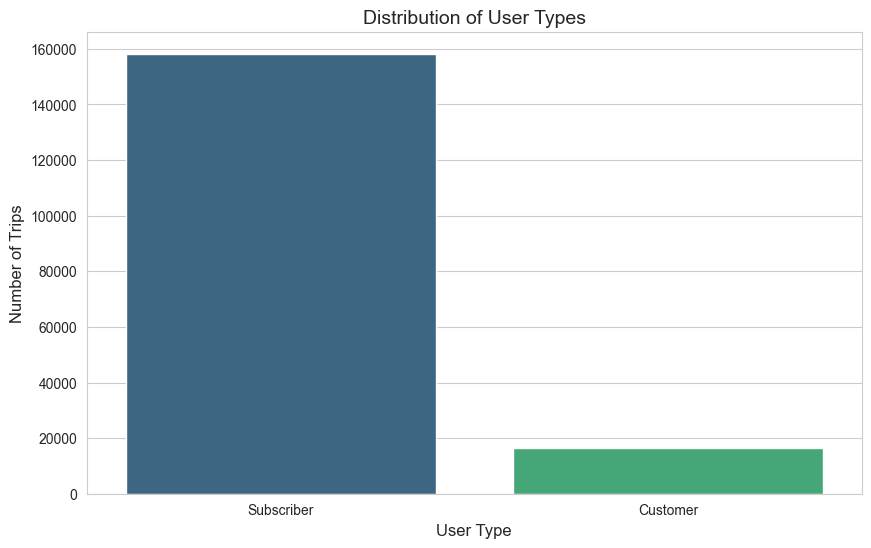

In [12]:
# Set visual style for professional reporting
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Loading the cleaned data
# df = pd.read_csv('cleaned_fordgobike_data.csv')

# ==========================================
# 1. UNIVARIATE ANALYSIS
# ==========================================

# A. Distribution of User Types
plt.figure()
sns.countplot(data=df, x='user_type', palette='viridis', order=df['user_type'].value_counts().index)
plt.title('Distribution of User Types', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.show()

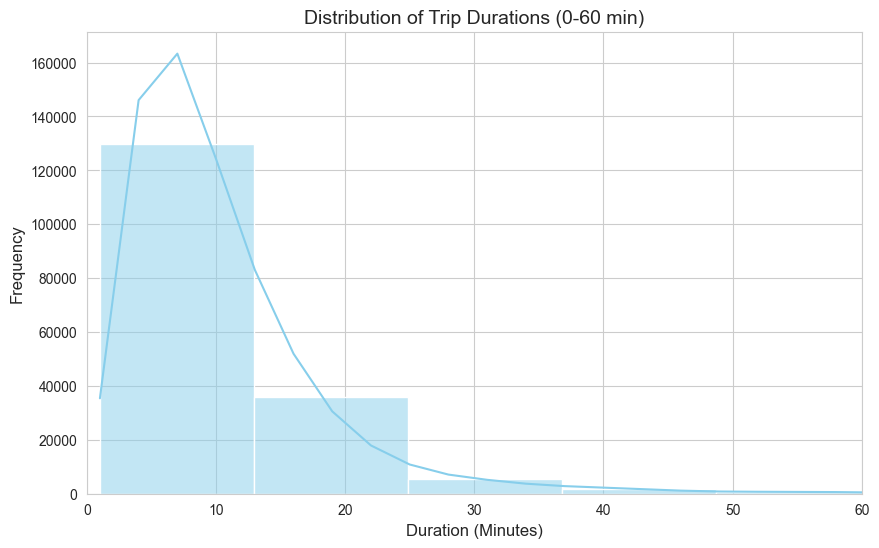

In [13]:
"""
Analyst Interpretation:
The bar chart clearly shows that the vast majority of users are 'Subscribers' compared to casual 'Customers'. 
This suggests that the bike-sharing system has a loyal, recurring user base, likely using the service for daily commutes.
"""

# B. Distribution of Trip Durations (Minutes)
plt.figure()
sns.histplot(df['duration_min'], bins=50, kde=True, color='skyblue')
plt.xlim(0, 60) # Focusing on the most common trips (under 1 hour)
plt.title('Distribution of Trip Durations (0-60 min)', fontsize=14)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

C:\Users\zbook g6\AppData\Local\Temp\ipykernel_16772\1009793406.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['duration_min'] <= 60], x='user_type', y='duration_min', palette='Set2')


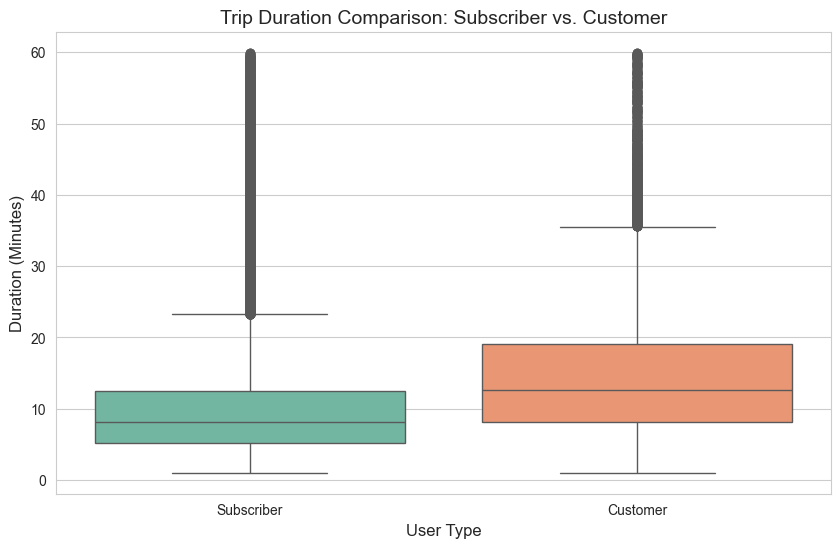

In [14]:
"""
Analyst Interpretation:
The distribution is heavily right-skewed. Most trips are very short, peaking between 5 to 12 minutes. 
This indicates that users primarily use bikes for "last-mile" connectivity or short-distance travel.
"""

# ==========================================
# 2. BIVARIATE ANALYSIS
# ==========================================

# A. Trip Duration vs. User Type
plt.figure()
sns.boxplot(data=df[df['duration_min'] <= 60], x='user_type', y='duration_min', palette='Set2')
plt.title('Trip Duration Comparison: Subscriber vs. Customer', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.show()

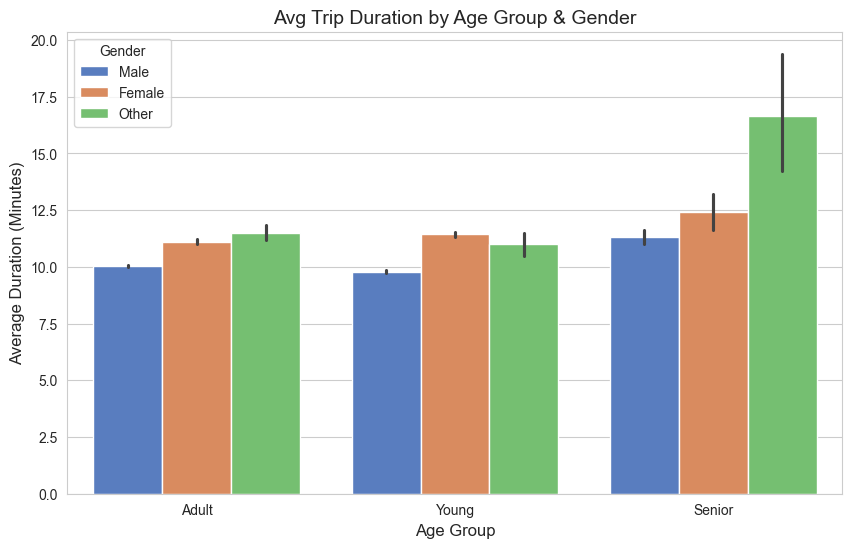

In [15]:


"""
Analyst Interpretation:
Although there are fewer 'Customers' than 'Subscribers', customers tend to have longer median trip durations. 
Subscribers likely use the bikes for efficient, direct commutes, while customers might be using them for leisure or exploration.
"""

# ==========================================
# 3. MULTIVARIATE ANALYSIS
# ==========================================

# A. Average Duration by Age Group and Gender
plt.figure()
sns.barplot(data=df[df['duration_min'] <= 60], x='age_group', y='duration_min', hue='member_gender', palette='muted')
plt.title('Avg Trip Duration by Age Group & Gender', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Duration (Minutes)', fontsize=12)
plt.legend(title='Gender')
plt.show()

C:\Users\zbook g6\AppData\Local\Temp\ipykernel_16772\1595405939.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_stations.index, x=top_stations.values, palette='magma')


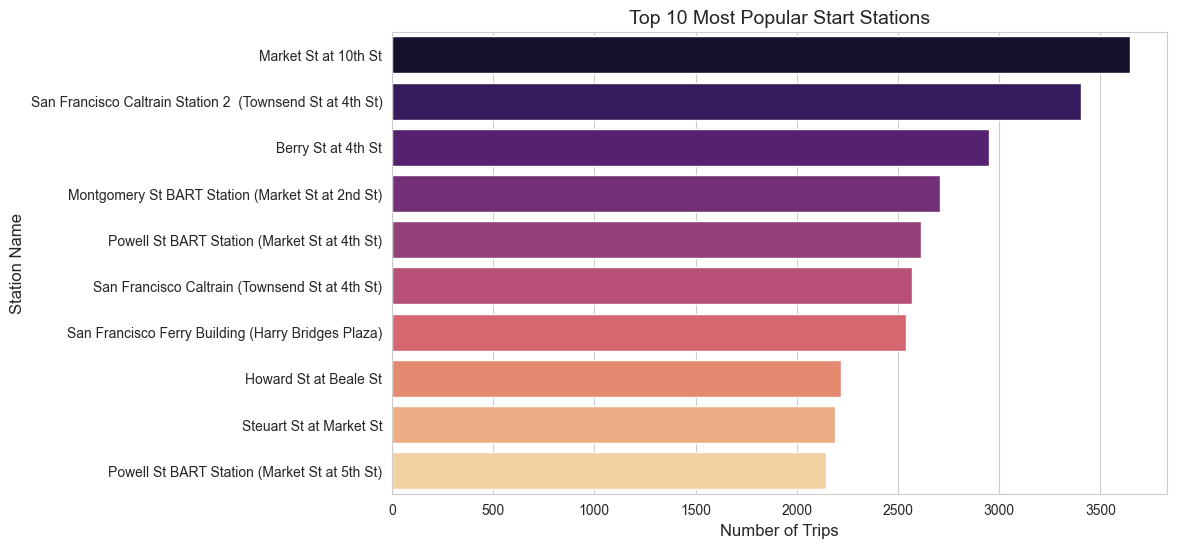

"\nAnalyst Interpretation:\nMarket St and San Francisco Caltrain stations dominate the trip starts. \nThese are major transit hubs, confirming that the service is highly integrated with the city's public transport network.\n"

In [16]:


"""
Analyst Interpretation:
Interestingly, users categorized as 'Seniors' (60+) show a relatively high average duration compared to other groups. 
Additionally, users identifying as 'Other' or 'Female' generally have slightly longer average trip times than 'Male' users across most age groups.
"""

# ==========================================
# 4. STATION ANALYSIS
# ==========================================

# Top 10 Most Popular Start Stations
top_stations = df['start_station_name'].value_counts().head(10)
plt.figure()
sns.barplot(y=top_stations.index, x=top_stations.values, palette='magma')
plt.title('Top 10 Most Popular Start Stations', fontsize=14)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Station Name', fontsize=12)
plt.show()

"""
Analyst Interpretation:
Market St and San Francisco Caltrain stations dominate the trip starts. 
These are major transit hubs, confirming that the service is highly integrated with the city's public transport network.
"""